In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use("fivethirtyeight")
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset=pd.read_csv("salary.csv")
dataset.head()

,YearsExperience,Salary,age,company_change,type
0,1.1,39343,21,1,junior
1,1.3,46205,31,0,middle
2,1.5,37731,29,1,middle
3,2.0,43525,30,1,middle
4,2.2,39891,27,1,middle


In [3]:
dataset.isnull().sum()

YearsExperience    0
Salary             0
age                0
company_change     0
type               0
dtype: int64

In [4]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.313333,2.837888,1.1,3.20,4.7,7.70,10.5
Salary,30.0,76003.000000,27414.429785,37731.0,56720.75,65237.0,100544.75,122391.0
age,30.0,34.266667,7.031620,21.0,29.00,34.0,37.75,56.0
company_change,30.0,0.400000,0.498273,0.0,0.00,0.0,1.00,1.0


In [5]:
dataset.corr()

,YearsExperience,Salary,age,company_change
YearsExperience,1.000000,0.978242,0.641433,-0.476989
Salary,0.978242,1.000000,0.656129,-0.552734
age,0.641433,0.656129,1.000000,-0.444854
company_change,-0.476989,-0.552734,-0.444854,1.000000


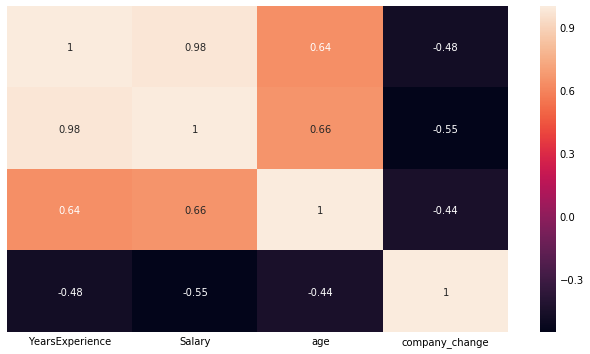

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(dataset.corr(),yticklabels=False,annot=True)

<Figure size 720x432 with 0 Axes>

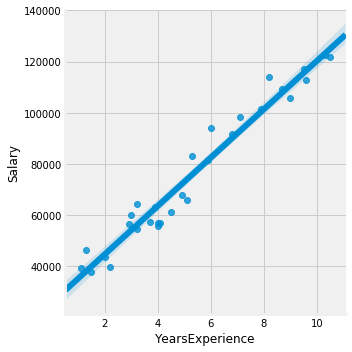

In [7]:
plt.figure(figsize=(10,6))
sns.lmplot(x="YearsExperience",y="Salary",data=dataset)

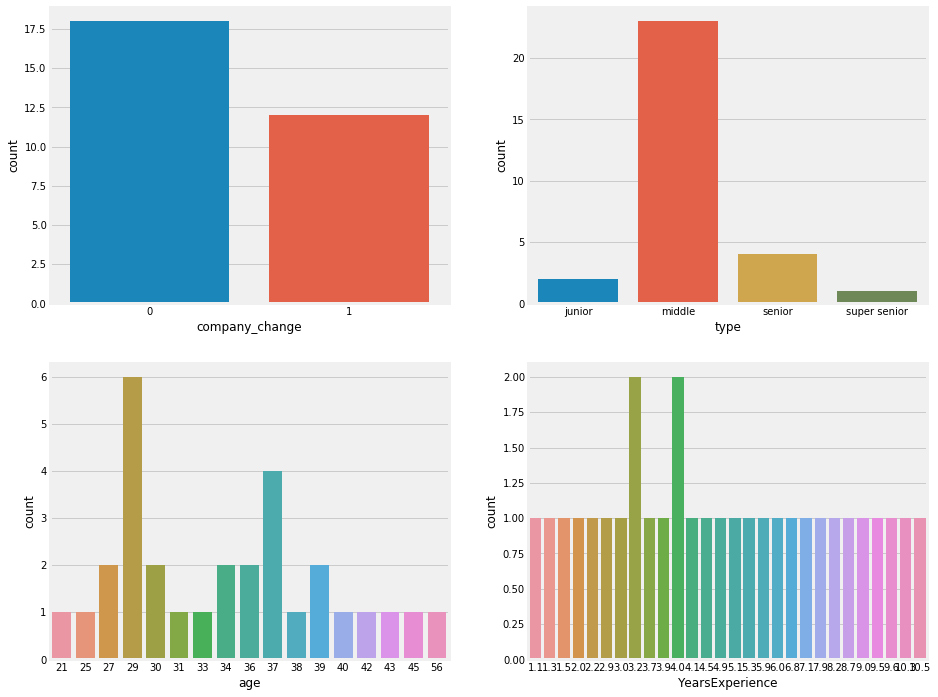

In [8]:
ax=plt.figure(figsize=(14,12))
ax.add_subplot(2,2,1)
sns.countplot(dataset["company_change"])
ax.add_subplot(2,2,2)
sns.countplot(dataset["type"])
ax.add_subplot(2,2,3)
sns.countplot(dataset["age"])
ax.add_subplot(2,2,4)
sns.countplot(dataset["YearsExperience"])

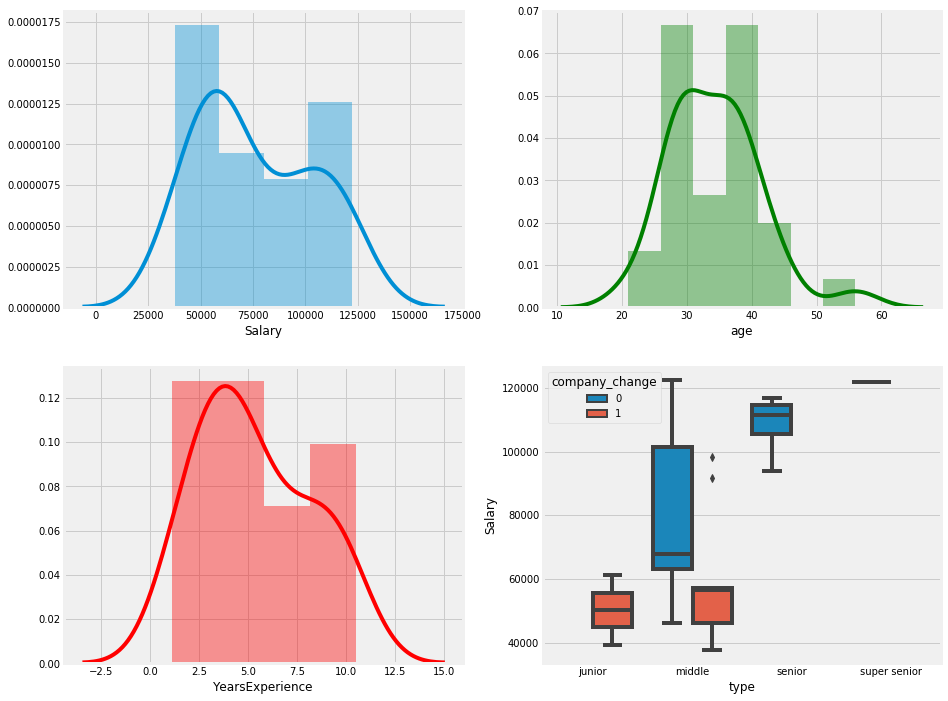

In [9]:
ax=plt.figure(figsize=(14,12))
ax.add_subplot(2,2,1)
sns.distplot(dataset["Salary"])
ax.add_subplot(2,2,2)
sns.distplot(dataset["age"],color="g")
ax.add_subplot(2,2,3)
sns.distplot(dataset["YearsExperience"],color="r")
ax.add_subplot(2,2,4)
sns.boxplot(x="type",y="Salary",data=dataset,hue="company_change")

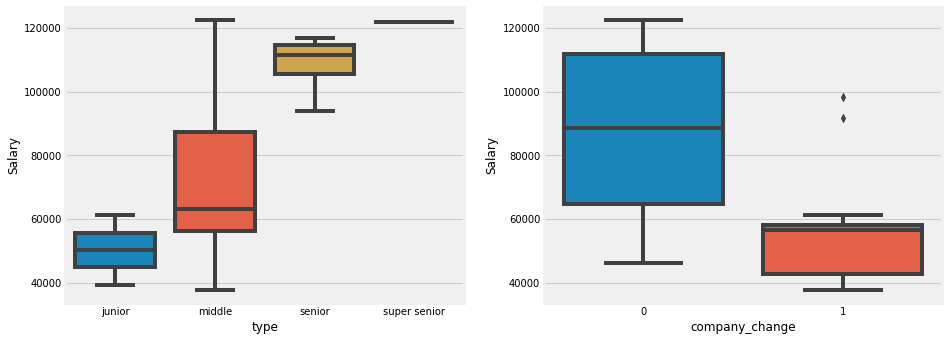

In [10]:
ax=plt.figure(figsize=(14,12))
ax.add_subplot(2,2,1)
sns.boxplot(x="type",y="Salary",data=dataset)
ax.add_subplot(2,2,2)
sns.boxplot(x="company_change",y="Salary",data=dataset)

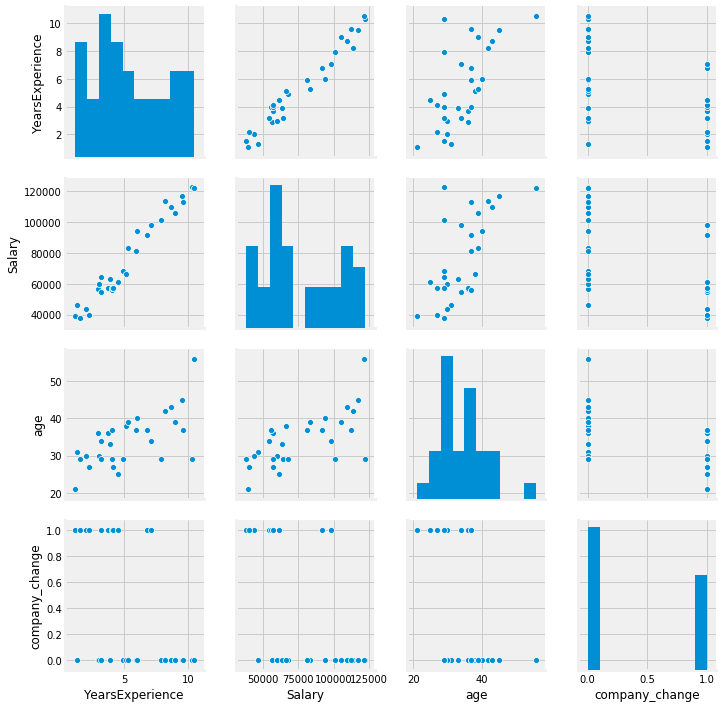

In [11]:
sns.pairplot(dataset)

In [12]:
x=np.array(dataset['YearsExperience'])
y=np.array(dataset['Salary'])
l=len(x)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,explained_variance_score

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=6)
lx=len(x_train)

# Ridge regression

In [15]:
l2=10
def ridgeregression(l2):
    m,c,alpha=0.1,0.5,0.01
    for i in range(4000):
        slope=0
        intercept=0
        for j in range(l):
             intercept=intercept+((m*x[j]+c)-y[j])
             slope=slope+((m*x[j]+c)-y[j])*x[j]+l2*m
        c=c-((alpha*intercept)/l)
        m=m-((alpha*slope)/l)
    print(f"slope is {m}")
    print(f"intercept is {c}")
    y_pred=[]
    for i in x_test:
        v=m*i+c
        y_pred.append(v)
    error=pd.DataFrame([[mean_squared_error(y_test,y_pred),
                    mean_absolute_error(y_test,y_pred),
                    explained_variance_score(y_test,y_pred)]],
                   columns=["mean_squared_error",
                                 "mean_absolute_error","explained_variance_score"])
    print(error)
    plt.plot(x_test,y_pred,marker='o',
         color='blue',markerfacecolor='red',
         markersize=10,linestyle='dashed')
    plt.scatter(x,y,marker='o',color='red')
    plt.xlabel("YearsExperience")
    plt.ylabel("salary")
    plt.title(f"l2=={l2}")
    plt.show()

slope is 9450.704878460741
intercept is 25787.196304094174
   mean_squared_error  mean_absolute_error  explained_variance_score
0        3.239839e+07          4685.123851                  0.971217


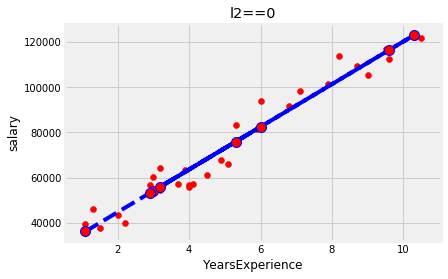

In [16]:
ridgeregression(0)

slope is 4136.564992651515
intercept is 54024.04669919181
   mean_squared_error  mean_absolute_error  explained_variance_score
0        2.451521e+08         14325.766894                  0.694735


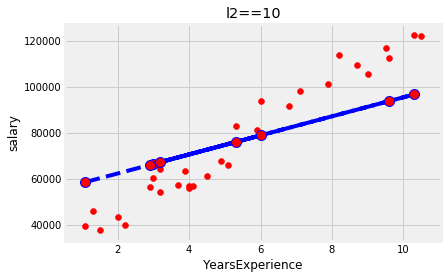

In [17]:
ridgeregression(10)

slope is 2647.796121454929
intercept is 61934.37652529749
   mean_squared_error  mean_absolute_error  explained_variance_score
0        4.023759e+08         18233.785181                  0.493048


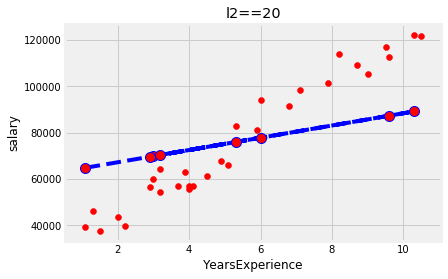

In [18]:
ridgeregression(20)

slope is 2243.985898924971
intercept is 64079.95490629697
   mean_squared_error  mean_absolute_error  explained_variance_score
0        4.523870e+08         19293.787015                  0.428969


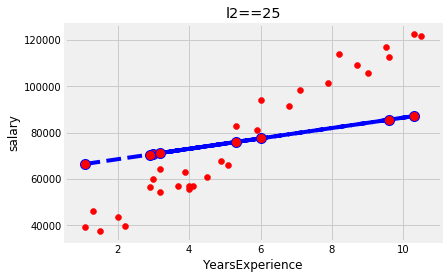

In [19]:
ridgeregression(25)

slope is 682.5562044000726
intercept is 72376.35136728674
   mean_squared_error  mean_absolute_error  explained_variance_score
0        6.753439e+08         23392.539963                  0.143553


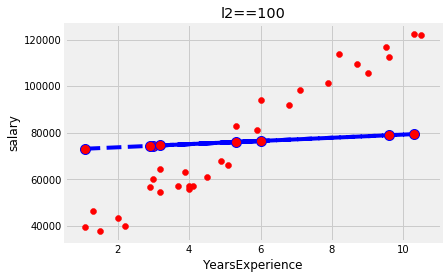

In [20]:
ridgeregression(100)